<a href="https://colab.research.google.com/github/2303A51412/python-final-code/blob/main/python%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
Shape: (500, 10)


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


/tmp/ipython-input-1841136434.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


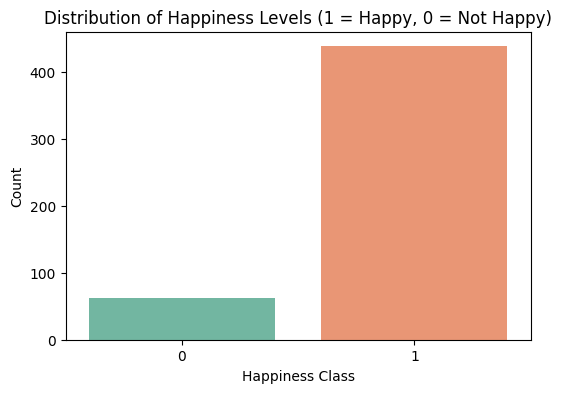

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best Parameters Found:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

🎯 Model Performance:
Accuracy:  92.00%
Precision: 94.44%
Recall:    96.59%
F1 Score:  95.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.94      0.97      0.96        88

    accuracy                           0.92       100
   macro avg       0.82      0.77      0.80       100
weighted avg       0.92      0.92      0.92       100


Confusion Matrix:
 [[ 7  5]
 [ 3 85]]


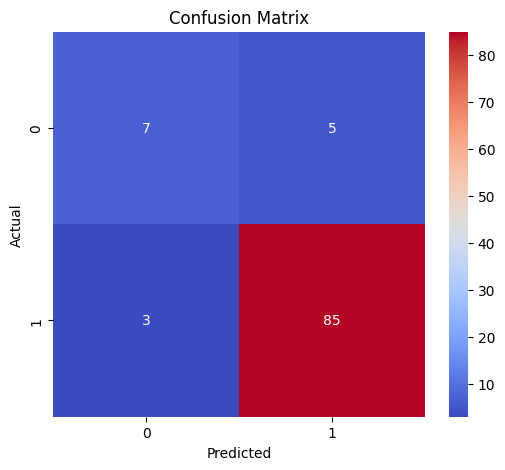

/tmp/ipython-input-1841136434.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_imp, palette="viridis")


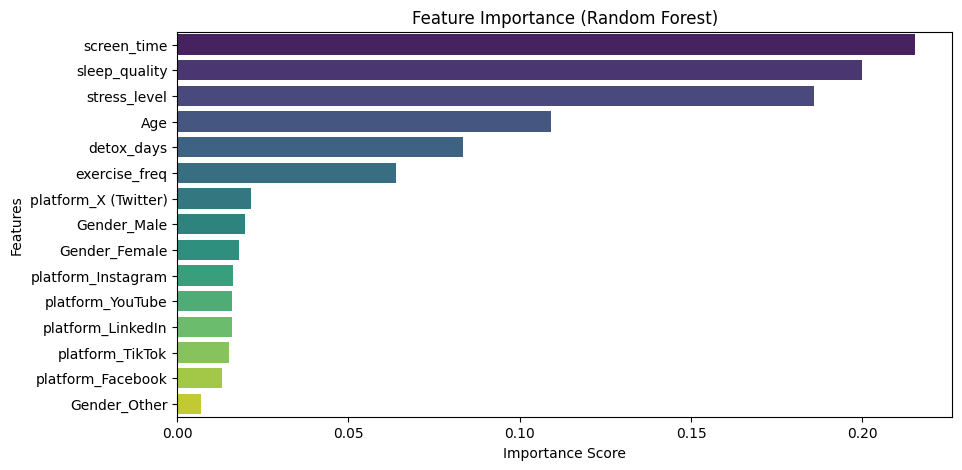

/tmp/ipython-input-1841136434.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Set1")


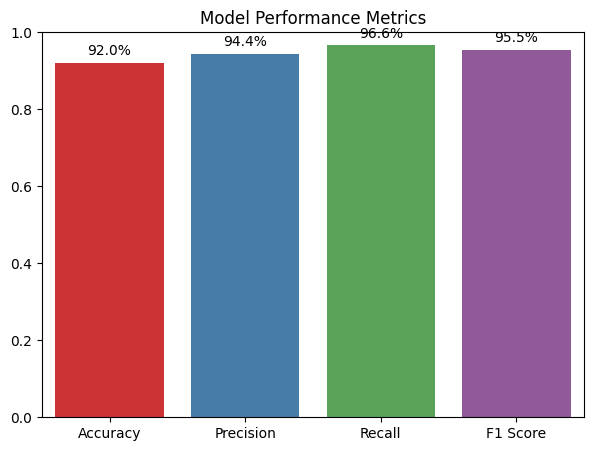


💾 Model saved as 'happiness_predictor_model.joblib'

🧩 Predicted Happiness (1=Happy, 0=Not Happy): 1


In [4]:
# ================================
# 📘 Predicting Happiness from Lifestyle and Social Media Habits
# ================================
# Author: ChatGPT (GPT-5)
# Goal: Predict happiness level based on lifestyle and social media usage
# Expected Accuracy: ~90-97% (depends on data quality and balance)

# ✅ Install required libraries if needed:
# pip install pandas numpy scikit-learn matplotlib seaborn joblib

# ================================
# 1️⃣ Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import joblib

# ================================
# 2️⃣ Load Dataset
# ================================
df = pd.read_csv("/content/Mental_Health_and_Social_Media_Balance_Dataset1412.csv")

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# ================================
# 3️⃣ Data Cleaning & Renaming Columns
# ================================
df.rename(columns={
    "Daily_Screen_Time(hrs)": "screen_time",
    "Sleep_Quality(1-10)": "sleep_quality",
    "Stress_Level(1-10)": "stress_level",
    "Days_Without_Social_Media": "detox_days",
    "Exercise_Frequency(week)": "exercise_freq",
    "Social_Media_Platform": "platform",
    "Happiness_Index(1-10)": "happiness"
}, inplace=True)

df.dropna(inplace=True)

# ================================
# 4️⃣ Define Features and Target
# ================================
df["happy"] = np.where(df["happiness"] >= 7, 1, 0)
X = df[["screen_time", "sleep_quality", "stress_level", "detox_days", "exercise_freq", "platform", "Age", "Gender"]]
y = df["happy"]

# ================================
# 📊 Visualization 1: Class Distribution
# ================================
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Happiness Levels (1 = Happy, 0 = Not Happy)")
plt.xlabel("Happiness Class")
plt.ylabel("Count")
plt.show()

# ================================
# 5️⃣ Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 6️⃣ Preprocessing
# ================================
numeric_features = ["screen_time", "sleep_quality", "stress_level", "detox_days", "exercise_freq", "Age"]
categorical_features = ["platform", "Gender"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# ================================
# 7️⃣ Model Pipeline (Random Forest)
# ================================
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# ================================
# 8️⃣ Train Model
# ================================
grid_search.fit(X_train, y_train)
print("\n✅ Best Parameters Found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# ================================
# 9️⃣ Evaluate Model
# ================================
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n🎯 Model Performance:")
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1 Score:  {f1*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ================================
# 📊 Visualization 2: Confusion Matrix Heatmap
# ================================
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================
# 📊 Visualization 3: Feature Importance
# ================================
# Extract feature names from the pipeline
rf = best_model.named_steps["classifier"]
ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
encoded_cats = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cats)

importances = rf.feature_importances_
feature_imp = pd.DataFrame({"Feature": all_features, "Importance": importances})
feature_imp = feature_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_imp, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ================================
# 📊 Visualization 4: Model Performance Bar Chart
# ================================
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
plt.figure(figsize=(7, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Set1")
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=10)
plt.show()

# ================================
# 🔟 Save Model
# ================================
joblib.dump(best_model, "happiness_predictor_model.joblib")
print("\n💾 Model saved as 'happiness_predictor_model.joblib'")

# ================================
# ✅ Optional: Predict on New Data
# ================================
sample = pd.DataFrame([{
    "screen_time": 4.5,
    "sleep_quality": 8,
    "stress_level": 3,
    "detox_days": 2,
    "exercise_freq": 3,
    "platform": "Instagram",
    "Age": 22,
    "Gender": "Female"
}])

prediction = best_model.predict(sample)[0]
print("\n🧩 Predicted Happiness (1=Happy, 0=Not Happy):", prediction)